In [ ]:
!nvidia-smi


Fri Aug 27 01:20:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15301, done.
remote: Total 15301 (delta 0), reused 0 (delta 0), pack-reused 15301
Receiving objects: 100% (15301/15301), 13.69 MiB | 5.58 MiB/s, done.
Resolving deltas: 100% (10401/10401), done.
Checking out files: 100% (2044/2044), done.


In [ ]:
%cd /content/gdrive/My Drive/IT/darknet yolo test/darknet

/content/gdrive/My Drive/IT/yolo/darknet


In [ ]:
# tạo folder backup trùng với folder backup trong obj.data
!mkdir backup

In [ ]:
#Tạo file train.txt, valid.txt theo đoạn code
import os
import numpy as np

#"obj" là tên thư mục chứa cả ảnh và file annotation.
lst_files = os.listdir("data/obj/")
lst_images = []
for file in lst_files:
  if ".txt" not in file:
    lst_images.append(file)

#Tách 200 ảnh ra làm tập validation
random_idx = np.random.randint(0, len(lst_images), 200)

#Tạo file train.txt được đặt trong thư mục darknet/data
with open("data/train.txt","w") as f:
  for idx in range(len(lst_images)):
    if idx not in random_idx:
      f.write("data/obj/"+lst_images[idx]+"\n")

#Tạo file valid.txt được đặt trong thư mục darknet/data
with open("data/valid.txt","w") as f:
  for idx in random_idx:
    f.write("data/obj/"+lst_images[idx]+"\n")

In [ ]:
!make


mkdir -p ./obj/
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./

In [ ]:
!chmod +x ./darknet

In [ ]:
!echo bia > obj.names
!echo cafe >> obj.names
!echo mytom >> obj.names
!echo nuoctuong >> obj.names
!echo sua >> obj.names

In [ ]:
!echo classes=5 > obj.data
!echo train=train.txt >> obj.data
!echo valid=valid.txt >> obj.data
!echo names=obj.names >> obj.data
!echo backup=backup >> obj.data

**train**

In [ ]:
!./darknet detector train data/obj.data cfg/yolo-tinyv4-obj.cfg yolov4-tiny.conv.29 -dont_show 


**case of killed**

In [ ]:

!./darknet detector train data/obj.data cfg/yolo-tinyv4-obj.cfg backup/yolo-tinyv4-obj_last.weights -dont_show 

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.877250), count: 1, class_loss = 0.035892, iou_loss = 0.173119, total_loss = 0.209011 
 total_bbox = 176301, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.942908), count: 5, class_loss = 0.000000, iou_loss = 0.227644, total_loss = 0.227644 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 176306, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.918635), count: 4, class_loss = 0.000002, iou_loss = 0.104737, total_loss = 0.104739 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 

**test**

In [ ]:
!./darknet detector test data/obj.data cfg/yolo-tinyv4-obj.cfg backup/yolo-tinyv4-obj_final.weights data/test/bia3.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	   

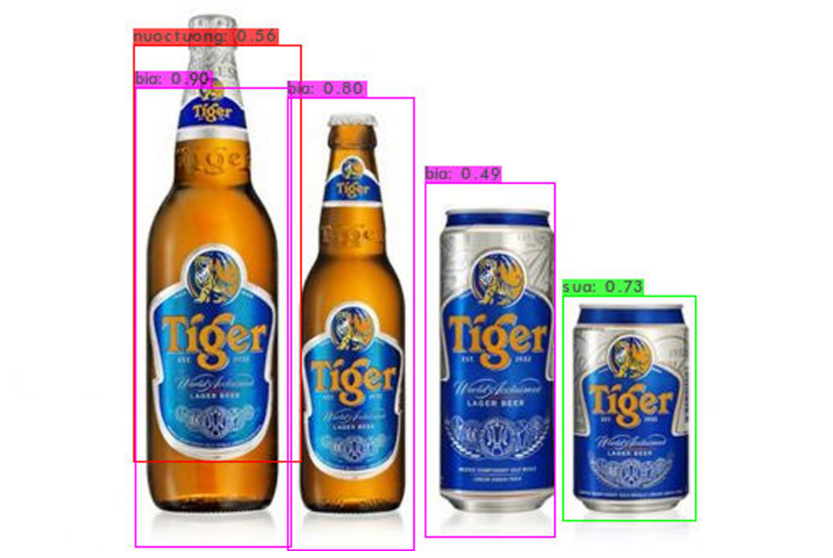

In [ ]:
def show(path):
  import cv2
  import matplotlib.pyplot as plt
  image = cv2.imread(path)
  original_width, original_height = image.shape[1], image.shape[0]
  resized_image = cv2.resize(image, (2*original_width, 2*original_height), interpolation = cv2.INTER_CUBIC)
  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(20,10))
  plt.axis("off")
  plt.imshow(resized_image)
  plt.show()

show("predictions.jpg")